In [13]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import glob

In [17]:
# Define files to read
path = 'C:/Users/guypw/OneDrive/Documents/resolvinAnalysis/data/lipidomics/Results/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [19]:
# Import data
dfs = []

for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    
    df['Comparison'] = f
    
    dfs.append(df)

In [20]:
dfs = [df.set_index('id') for df in dfList]


[        Unnamed: 0     logFC   AveExpr         t   P.Value  adj.P.Val  \
 0             RvD6  1.422757  1.006418  2.874592  0.006536   0.222233   
 1    5S,12S-diHETE  1.295662  1.105998  2.444502  0.019157   0.325671   
 2      RvT3n-3 DPA -0.824645  0.680881 -1.790793  0.081138   0.919564   
 3             LTB4  0.824071  1.607599  1.593019  0.119279   0.969591   
 4             RvD2 -1.154395  1.461077 -1.432020  0.160152   0.969591   
 5        PD1n-3DPA -0.536689  0.443576 -1.267462  0.212551   0.969591   
 6             LXB4 -1.011549  3.139859 -1.208005  0.234364   0.969591   
 7             TxB2 -1.398570  2.387416 -1.197508  0.238380   0.969591   
 8             PGE2 -0.832304  1.639856 -1.151310  0.256657   0.969591   
 9             RvD1  0.640436  1.123339  1.057162  0.296982   0.980857   
 10      RvD2n-3DPA  0.730739  2.465953  0.852395  0.399230   0.980857   
 11            RvE3  0.653105  1.748865  0.849273  0.400944   0.980857   
 12            MaR1 -0.398651  0.43854

In [5]:
# Define significant and non-significant datasets

non_sig = data.loc[data['P.Value'] > 0.05]
non_sig_upreg = non_sig.loc[non_sig['logFC'] > 0]
non_sig_downreg = non_sig.loc[non_sig['logFC'] < 0]
sig = data.loc[data['P.Value'] < 0.05]
sig_upreg = sig.loc[sig['logFC'] > 0]
sig_downreg = sig.loc[sig['logFC'] < 0]

In [7]:
# Convert resolvins to numbers
idx_dict = defaultdict(float)
for idx, row in data.iterrows():
    idx_dict[row[0]] = float(idx) + 1

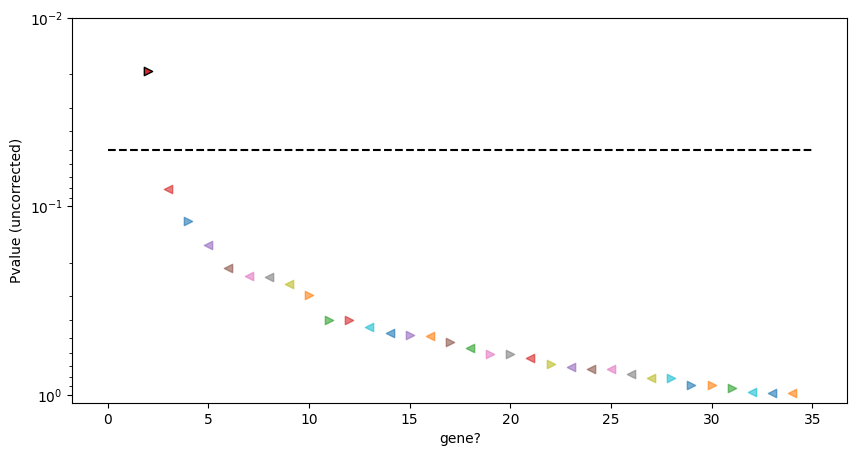

In [12]:
# Create plot
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
for idx, row in non_sig_upreg.iterrows():
    plt.scatter(idx_dict[row[0]], row[4], marker = '>', alpha = 0.6)
for idx, row in non_sig_downreg.iterrows():
    plt.scatter(idx_dict[row[0]], row[4], marker = '<', alpha = 0.6)
for idx, row in sig_upreg.iterrows():
    plt.scatter(idx_dict[row[0]], row[4], marker = '>', edgecolors = 'black')
for idx, row in sig_downreg.iterrows():
    plt.scatter(idx_dict[row[0]], row[4], marker = '<', edgecolors = 'black')
plt.plot([0, 35], [0.05, 0.05], linestyle = 'dashed', color = 'black')
plt.ylim(0.01, 1.1)
plt.gca().invert_yaxis()
plt.ylabel('Pvalue (uncorrected)')
plt.xlabel('gene?')
ax.set_yscale('log')

In [ ]:
idx
